### The normal distribution

The next probability distribution we'll discuss is the normal distribution. It's one of the most important probability distributions you'll learn about since a countless number of statistical methods rely on it, and it applies to more real-world situations than the distributions we've covered so far.

### What is the normal distribution?

The normal distribution looks like this. Its shape is commonly referred to as a "bell curve". 

<img src="nd.jpg" style="max-width:600px">


The normal distribution has a few important properties.

- `Symmetrical`: First, it's symmetrical, so the left side is a mirror image of the right.


- `Area = 1`: Second, just like any continuous distribution, the area beneath the curve is 1.


- `Curve never hits 0`: The probability never hits 0, even if it looks like it does at the tail ends. Only 0.006% of its area is contained beyond the edges of this graph.


- `Described by mean and standard deviation`: The normal distribution is described by its mean and standard deviation. 


<img src="nd-1.jpg" style="max-width:600px">

    
Here is a normal distribution with a mean of 20 and standard deviation of 3, and here is a normal distribution with a mean of 0 and a standard deviation of 1. 
    
When a normal distribution has mean 0 and a standard deviation of 1, it's a special distribution called the `standard normal distribution` Notice how both distributions have the same shape, but their axes have different scales.

- `Areas under the normal distribution`: For the normal distribution, `68%` of the area is within `1 standard deviation` of the mean. `95%` of the area falls within `2 standard deviations` of the mean,and `99.7%`of the area falls within `3 standard deviations`. This is sometimes called the `68-95-99.7` rule.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
amir_deals = pd.read_csv("amir_deals.csv")
amir_deals = amir_deals.drop("Unnamed: 0", axis = 1)
amir_deals.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


## Exercise 1: Distribution of Amir's sales

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

- Create a histogram with 10 bins to visualize the distribution of the amount. Show the plot.

- Which probability distribution do the sales amounts most closely follow?

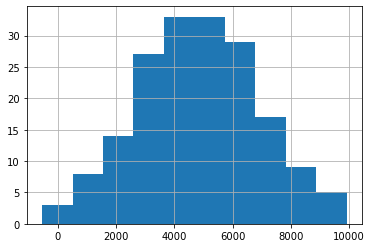

In [7]:
## q1: Create a histogram with 10 bins to visualize the distribution of the amount. Show the plot.
amir_deals["amount"].hist(bins=10)
plt.show()

In [8]:
## q2: Which probability distribution do the sales amounts most closely follow?

> Now that we've visualized the data, we can say that the sales amounts most closely follow Normal Distribution in the dataset. Now, we can approximate probabilities of different amounts using the normal distribution.

### Lots of histograms look normal

There's lots of real-world data shaped like the normal distribution. 

<img src="nd-2.jpg" style="max-width:600px">

For example, here is a histogram of the heights of women that participated in the National Health and Nutrition Examination Survey. The mean height is around 161 centimeters and the standard deviation is about 7 centimeters.

Since this height data closely resembles the normal distribution, we can take the area under a normal distribution with mean 161 and standard deviation 7 to approximate what percent of women fall into different height ranges.

####  What percent of women are shorter than 154 cm?

For example, what percent of women are shorter than 154 centimeters? 

<img src="nd-3.jpg" style="max-width:600px">

We can answer this using norm-dot-cdf from scipy-dot-stats, which takes the area of the normal distribution less than some number. We pass in the number of interest, 154, followed by the mean and standard deviation of the normal distribution we're using. This gives us about 16% of women are shorter than 154 centimeters.

#### What percent of women are taller than 154 cm?

To find the percent of women taller than 154 centimeters, we can take 1 minus the area on the left of 154, which equals the area to the right of 154.

<img src="nd-4.jpg" style="max-width:600px">

#### What percent of women are 154-157 cm?

To get the percent of women between 154 and 157 centimeters tall we can take the area below 157 and subtract the area below 154, which leaves us the area between 154 and 157.

<img src="nd-5.jpg" style="max-width:600px">

####  What height are 90% of women shorter than?
We can also calculate percentages from heights using norm-dot-ppf. To figure out what height 90% of women are shorter than, we pass 0-point-9 into norm-dot-ppf along with the same mean and standard deviation we've been working with. 

<img src="nd-6.jpg" style="max-width:600px">

This tells us that 90% of women are shorter than 170 centimeters tall.

####  What height are 90% of women taller than?

We can figure out the height 90% of women are taller than, since this is also the height that 10% of women are shorter than. We can take 1 minus point-9 to get point-1, which we'll use as the first argument of norm-ppf.

<img src="nd-7.jpg" style="max-width:600px">

## Exercise 2: Probabilities from the normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. 

As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

- What's the probability of Amir closing a deal worth less than `$`7500?


- What's the probability of Amir closing a deal worth more than `$`1000?


- What's the probability of Amir closing a deal worth between `$`3000 and `$`7000?


- What amount will 25% of Amir's sales be less than?

In [10]:
from scipy.stats import norm

In [11]:
## q1 : What's the probability of Amir closing a deal worth less than $7500?

prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

0.8943502263331446


In [12]:
## q2: What's the probability of Amir closing a deal worth more than $1000?
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

0.9772498680518208


In [13]:
## q3: What's the probability of Amir closing a deal worth between $3000 and $7000?
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

0.6826894921370859


In [14]:
## q4: What amount will 25% of Amir's sales be less than?
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)

3651.0204996078364


### Generating random numbers

Just like with other distributions, we can generate random numbers from a normal distribution using norm-dot-rvs, passing in the distribution's mean and standard deviation, as well as the sample size we want. Here, we've generated 10 more random heights.

<img src="nd-8.jpg" style="max-width:600px">

## Exercise 3: Simulating sales under new market conditions

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. 

To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution.

- Currently, Amir's average sale amount is `$`5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean.


- Amir's current standard deviation is `$`2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.


- Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.


- Plot the distribution of the new_sales amounts using a histogram and show the plot.

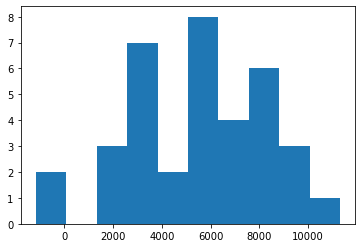

In [17]:
# q1
new_mean = 5000 + 5000 * 0.2

# q2
new_sd = 2000 + 2000 * 0.3

# q3
new_sales = norm.rvs(new_mean, new_sd, size = 36)

# q4
plt.hist(new_sales)
plt.show()

## Exercise 4: Which market is better?

The key metric that the company uses to evaluate salespeople is the percent of sales they make over `$`1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of `$`5000 and a standard deviation of `$`2000, and Amir's predicted amounts in next quarter's market have a mean of `$`6000 and a standard deviation of `$`2600.

Based only on the metric of percent of sales over `$`1000, does Amir perform better in the current market or the predicted market?

In [19]:
current_market = 1 - norm.cdf(1000, 5000, 2000)
current_market

0.9772498680518208

In [20]:
predicted_market = 1 - norm.cdf(1000, 6000, 2600)
predicted_market

0.9727648049862613

> In the current market, Amir makes sales over `$`1000 about `97.7%` of the time, and about `97.3%` of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market.

### The central limit theorem

Now that you're familiar with the normal distribution, it's time to learn about what makes it so important.

####  Rolling the dice 5 times

Let's go back to our dice rolling example. We have a Series of the numbers 1 to 6 called die. To simulate rolling the die 5 times, we'll call die-dot-sample. We pass in the Series we want to sample from, the size of the sample, and set replace to True. This gives us the results of 5 rolls. 

<img src="di.jpg" style="max-width:600px">

Now, we'll take the mean of the 5 rolls, which gives us 2.

If we roll another 5 times and take the mean, we get a different mean. If we do it again, we get another mean.

<img src="di-1.jpg" style="max-width:600px">

#### Rolling the dice 5 times 10 times

Let's repeat this 10 times: we'll roll 5 times and take the mean. To do this, we'll use a for loop. We start by creating an empty list called sample_means to hold our means. We loop from 0 to 9 so that the process is repeated 10 times. Inside the loop, we roll 5 times and append the sample's mean to the sample_means list. 

<img src="di-2.jpg" style="max-width:600px">

This gives us a list of 10 different sample means. Let's plot these sample means.

### Sampling distributions

A distribution of a summary statistic like this is called a sampling distribution. This distribution, specifically, is a sampling distribution of the sample mean.

<img src="di-3.jpg" style="max-width:600px">

#### 100 sample means

Now let's do this 100 times. If we look at the new sampling distribution, its shape somewhat resembles the normal distribution, even though the distribution of the die is uniform.

<img src="di-4.jpg" style="max-width:600px">

#### 1000 sample means

Let's take 1000 means. This sampling distribution more closely resembles the normal distribution.

<img src="di-5.jpg" style="max-width:600px">

### Central limit theorem

This phenomenon is known as the central limit theorem, which states that a sampling distribution will approach a normal distribution as the number of trials increases. In our example, the sampling distribution became closer to the normal distribution as we took more and more sample means. 

<img src="clt.jpg" style="max-width:600px">

It's important to note that the central limit theorem only applies when samples are taken randomly and are independent.

### Standard deviation and the CLT

The central limit theorem, or CLT, applies to other summary statistics as well. If we take the standard deviation of 5 rolls 1000 times, the sample standard deviations are distributed normally, centered around 1.9, which is the distribution's standard deviation.

<img src="clt-1.jpg" style="max-width:600px">


### Proportions and the CLT

Another statistic that the CLT applies to is proportion. 

Let's sample from the sales team 10 times with replacement and see how many draws have Claire as the outcome. In this case, 10% of draws were Claire. 

<img src="clt-2.jpg" style="max-width:600px">

If we draw again, there are 40% Claires.

###  Sampling distribution of proportion

If we repeat this 1000 times and plot the distribution of the sample proportions, it resembles a normal distribution centered around 0-point-25, since Claire's name was on 25% of the tickets.

<img src="clt-3.jpg" style="max-width:600px">

### Mean of sampling distribution

Since these sampling distributions are normal, we can take their mean to get an estimate of a distribution's mean, standard deviation, or proportion. 

<img src="clt-4.jpg" style="max-width:600px">

If we take the mean of our sample means from earlier, we get 3.48. That's pretty close to the expected value, which is 3.5! 

Similarly, the mean of the sample proportions of Claires isn't far off from 0.25. 

In these examples, we know what the underlying distributions look like, but if we don't, this can be a useful method for estimating characteristics of an underlying distribution. 

The central limit theorem also comes in handy when you have a huge population and don't have the time or resources to collect data on everyone. Instead, you can collect several smaller samples and create a sampling distribution to estimate what the mean or standard deviation is.

## Exercise 5: The CLT in action

The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling


- Create a histogram of the num_users column of amir_deals and show the plot.

- Set the seed to 104. Take a sample of size 20 with replacement from the num_users column of amir_deals, and take the mean.

- Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each.

- Convert sample_means into a pd.Series, create a histogram of the sample_means, and show the plot.

In [24]:
amir_deals.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


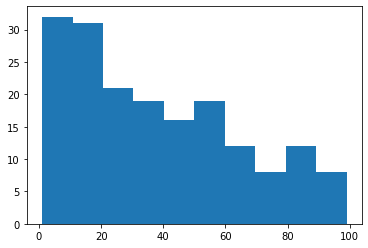

In [26]:
## q1: Create a histogram of the num_users column of amir_deals and show the plot.
plt.hist(amir_deals['num_users'])
plt.show()

32.0


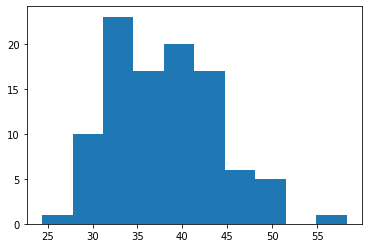

In [32]:
## q2: Set the seed to 104. 
## Take a sample of size 20 with replacement from the num_users column of amir_deals, and take the mean.

np.random.seed(104)
samp_20 = amir_deals['num_users'].sample(20, replace=True)
print(np.mean(samp_20))

## q3: Repeat this 100 times using a for loop and store as sample_means. 
## This will take 100 different samples and calculate the mean of each.

sample_means = []
for i in range(100):
    samp_20 = amir_deals['num_users'].sample(20, replace=True)
    sample_mean = np.mean(samp_20)
    sample_means.append(sample_mean)

#print(sample_means)

## q4: Convert sample_means into a pd.Series, create a histogram of the sample_means, and show the plot.

sample_means_series = pd.Series(sample_means)
#print(sample_means_series)
plt.hist(sample_means_series)
plt.show()

In [33]:
print(np.mean(amir_deals['num_users']))
print(np.mean(sample_means))

37.651685393258425
38.080000000000005


### The Poisson distribution

Now we'll talk about another probability distribution called the Poisson distribution.

### Poisson processes

Before we talk about probability, let's define a Poisson process. A Poisson process is a process where events appear to happen at a certain rate, but completely at random. 

- For example, the number of animals adopted from an animal shelter each week is a Poisson process - we may know that on average there are 8 adoptions per week, but this number can differ randomly. 


- Other examples would be the number of people arriving at a restaurant each hour, or the number of earthquakes per year in California. 


- The time unit like, hours, weeks, or years, is irrelevant as long as it's consistent.

### Poisson distribution

The Poisson distribution describes the probability of some number of events happening over a fixed period of time. 

- We can use the Poisson distribution to calculate the probability of at least 5 animals getting adopted in a week, 

- The probability of 12 people arriving in a restaurant in an hour, or 

- The probability of fewer than 20 earthquakes in California in a year.

### Lambda ($\lambda$)

The Poisson distribution is described by a value called `lambda`, which represents the average number of events per time period. In the animal shelter example, this would be the average number of adoptions per week, which is 8. This value is also the expected value of the distribution! The Poisson distribution with lambda equals 8 looks like this. 

<img src="poss.jpg" style="max-width:600px">

Notice that it's a discrete distribution since we're counting events, and 7 and 8 are the most likely number of adoptions to happen in a week.

### Lambda is the distribution's peak

<img src="l.jpg" style="max-width:600px">

Lambda changes the shape of the distribution, so a Poisson distribution with lambda equals 1, in blue, looks quite different than a Poisson distribution with lambda equals 8, in green, but no matter what, the distribution's peak is always at its lambda value.

### Probability of a single value

Given that the average number of adoptions per week is 8, what's the probability of 5 adoptions in a week? 

Just like the other probability distributions, we can import poisson from scipy-dot-stats. We'll use the poisson-dot-pmf function, passing 5 as the first argument and 8 as the second argument to indicate the distribution's mean. 

<img src="poss-1.jpg" style="max-width:800px">

This gives us about 9%.

### Probability of less than or equal to

To get the probability that 5 or fewer adoptions will happen in a week, use the poisson-dot-cdf function, passing in the same numbers. 

<img src="poss-2.jpg" style="max-width:800px">

This gives us about 20%.

### Probability of greater than

Just like other probability functions you've learned about so far, take 1 minus the "less than or equal to 5" probability to get the probability of more than 5 adoptions. 

<img src="poss-3.jpg" style="max-width:800px">

There's an 81% chance that more than 5 adoptions will occur. 

If the average number of adoptions rises to 10 per week, 

<img src="poss-4.jpg" style="max-width:800px">

there will be a 93% chance that more than 5 adoptions will occur.

## Exercise 6: Tracking lead responses

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. 

In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

- Import poisson from scipy.stats and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.


- Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?


- What's the probability that Amir responds to 2 or fewer leads in a day?


- What's the probability that Amir responds to more than 10 leads in a day?

In [8]:
## q1

# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)
print(prob_5)

0.1562934518505317


In [5]:
# q2
# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)
print(prob_coworker)

0.17140068409793663


In [6]:
# q3
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)
print(prob_2_or_less)

0.23810330555354436


In [7]:
# q4
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)
print(prob_over_10)

0.0028397661205137315


### Sampling from a Poisson distribution

Just like other distributions, we can take samples from Poisson distributions using poisson-dot-rvs. 

<img src="poss-5.jpg" style="max-width:600px">

Here, we'll simulate 10 different weeks at the animal shelter. In one week, there are 14 adoptions, but only 6 in another.

### The CLT still applies!

Just like other distributions, the sampling distribution of sample means of a Poisson distribution looks normal with a large number of samples.

<img src="poss-6.jpg" style="max-width:600px">

### Exponential distribution

The exponential distribution represents the probability of a certain time passing between Poisson events. We can use the exponential distribution to predict, for example, 

- the probability of more than 1 day between adoptions, 

- the probability of fewer than 10 minutes between restaurant arrivals, and 

- the probability of 6-8 months passing between earthquakes. 

Just like the Poisson distribution, the time unit doesn't matter as long as it's consistent. 

The exponential distribution uses the same lambda value, which represents the rate, that the Poisson distribution does. Note that lambda and rate mean the same value in this context. It's also continuous, unlike the Poisson distribution, since it represents time.

<img src="ed.jpg" style="max-width:500px">

For example, let's say that one customer service ticket is created every 2 minutes. We can rephrase this so it's in terms of a time interval of one minute, so half of a ticket is created each minute. We'll use 0.5 as the lambda value. The exponential distribution with a rate of one half looks like this.

<img src="ed-1.jpg" style="max-width:500px">

The rate affects the shape of the distribution and how steeply it declines.

<img src="ed-2.jpg" style="max-width:500px">

### Expected value of exponential distribution

Recall that lambda is the expected value of the Poisson distribution, which measures frequency in terms of rate or number of events. 

For example, let's say that one customer service ticket is created every 2 minutes. We can rephrase this so it's in terms of a `time interval of one minute`, so half of a ticket is created each minute. We'll use `0.5` as the lambda value.

The exponential distribution measures frequency in terms of `time between events`. The expected value of the exponential distribution can be calculated by taking 1 divided by lambda. 

In our example, the expected time between requests is 1 over one half, which is 2, so there is an average of 2 minutes between requests.

<img src="ed-3.jpg" style="max-width:500px">


### How long until a new request is created?

Similar to other continuous distributions, we can use expon-dot-cdf to calculate probabilities. 

<img src="ed-4.jpg" style="max-width:800px">

The probability of waiting less than 1 minute for a new request is calculated using expon-cdf, passing in 1 followed by scale equals 0.5, which gives us about an 86% chance. 

The probability of waiting more than 3 minutes can be found using 1 minus expon-cdf of 3, scale equals point 5, giving a 0.2% chance. 

Finally, the probability of waiting between 1 and 3 minutes can be found by taking expon-cdf of 3 and subtracting expon-cdf of 1. There's a 13% chance you'll wait between 1 and 3 minutes.

## Exercise 7: Modeling time between leads

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. 

In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

- Import expon from scipy.stats. What's the probability it takes Amir less than an hour to respond to a lead?


- What's the probability it takes Amir more than 4 hours to respond to a lead?


- What's the probability it takes Amir 3-4 hours to respond to a lead?

In [9]:
## q1

# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


In [10]:
## q2

# Print probability response takes > 4 hours
print(1-expon.cdf(4, scale = 2.5))

0.20189651799465536


In [11]:
## q3

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale = 2.5) - expon.cdf(3, scale = 2.5))

0.09929769391754684


### (Student's) t-distribution

The next distribution is the t-distribution, which is also sometimes called Student's t-distribution. Its shape is similar to the normal distribution, but not quite the same. 

<img src="t.jpg" style="max-width:500px">

If we compare the normal distribution, in blue, with the t-distribution with one degree of freedom, in orange, the t-distribution's tails are thicker. This means that in a t-distribution, observations are more likely to fall further from the mean.

### Degrees of freedom

The t-distribution has a parameter called degrees of freedom, which affects the thickness of the distribution's tails. Lower degrees of freedom results in thicker tails and a higher standard deviation. As the number of degrees of freedom increases, the distribution looks more and more like the normal distribution.

<img src="t-1.jpg" style="max-width:600px">


### Log-normal distribution

The last distribution we'll discuss is the log-normal distribution. Variables that follow a log-normal distribution have a logarithm that is normally distributed. This results in distributions that are skewed, unlike the normal distribution. 

<img src="ln.jpg" style="max-width:800px">

There are lots of real-world examples that follow this distribution, such as the length of chess games, blood pressure in adults, and the number of hospitalizations in the 2003 SARS outbreak.